# Notebook to train RBMs localy and analyse the results quikly

## Training
The rbm training is outsourced to the `TrainRBM.py` script. It needs to be provieded with 2 things :
* a yaml configuration file (like `sample_config.yaml`)
* a number of threads to use (if you don't give any it will use all availables threads on your machine)

This script will pickle-save the trained RBM in the directory specified in the config file. It will also pickle-save the `record` dictionary provided by the `rbm.fit` method. 

On top of that, the `TrainRBM.py` script will produce a png image containing multiple graphs useful to check whether the RBM has converged. All parameters present in the yaml config file, as well as some information comming from the script itself (like likelihoods, durations, ...), are saved in the comment section of the png metadata.

In [1]:
%%time
%run TrainRBM.py --num_threads=1 --config_path=test_config.yaml

SETTING UP


/SEC/ZebraFish/Tools_Analysis/RBM_ZebraFish/PGM/source/numba_utilities.py:1124: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dmean_v_dw = np.dot(s1.T, V)
/SEC/ZebraFish/Tools_Analysis/RBM_ZebraFish/PGM/source/numba_utilities.py:1125: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dvar_e_dw = np.dot(s2.T, V)
/SEC/ZebraFish/Tools_Analysis/RBM_ZebraFish/PGM/source/numba_utilities.py:1126: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  tmp3 = np.dot(s3.T, V)
/SEC/ZebraFish/Tools_Analysis/RBM_ZebraFish/PGM/source/numba_utilities.py:961: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 1d, A), array(float32, 2d, A))
  mean_V = np.dot(weights, V) / sum_weights



PREPARING OUTPUT PATHS

LOADIND DATA
spikes loaded  -->  shape = (5500, 1232)  (should be [time x neurons])
	 5500 time steps  |  1232 neurons
spikes shuffled
loaded 4125 (75.0)% time steps for training.
loaded 1375 (25.0)% time steps for validation.

SETTING UP RBM

LEARNING STARTED
Starting Likelihood = -855.3782
Iteration number 0, pseudo-likelihood: -0.13
Starting epoch 1
Mismatch dimensions (10, 50), [100, 50], reinitializating I
Mismatch dimensions (10, 1232), [100, 1232], reinitializating I
[RBM] Iteration 1, time = 5.74s, pseudo-likelihood = -0.13
Starting epoch 2
[RBM] Iteration 2, time = 5.90s, pseudo-likelihood = -0.14
Mismatch dimensions (100, 50), [10, 50], reinitializating I
Mismatch dimensions (100, 1232), [10, 1232], reinitializating I
Done. Likelihood : -855.3782 --> -164.8700

SAVING RBM + LEARNING DATA

GENERATING DATA
Mismatch dimensions (10, 50), [100, 50], reinitializating I
Mismatch dimensions (10, 1232), [100, 1232], reinitializating I

PRODUCING PLOTS


/home/mkk/envs/rbm/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/mkk/envs/rbm/lib/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Durations :
	total : 0:01:26.991740
	fit : 0:00:11.881607
	gen : 0:00:30.238380

Done.
CPU times: user 1min 25s, sys: 249 ms, total: 1min 25s
Wall time: 1min 30s


## Quick analysis of training
As mentioned above, `TrainRBM.py` produces a png image containing multiple graphs to assess RBM convergence. The comment section of this png's metadata contains all the paramters and relevant paths.

The name of this png ends with `_TandI.png`, and the path to this image should be provided bellow.

In [5]:
TandI_path = "out/RBM_20180706_Run04_spontaneous_rbm0_20210723_122652_TandI.png"

In [6]:
from PIL import Image
import ast

In [8]:
# get parameters from png metadata

img = Image.open(TandI_path)
img.getexif().items()
config = img.info["comment"]
print(img.info["comment"])

name
	20180706_Run04_spontaneous_rbm0
paths
	main_in
		/SEC/ZebraFish/Data/Voxmatok_out/test2/
	spikes_in
		20180706_Run04_spontaneous_rbm0/20180706_Run04_spontaneous_rbm0_voxels_activity_20210713_110920.npy
	main_out
		./out/
	temp_dir
		temp/
	clean
		True
	outpath
		/SEC/ZebraFish/Tools_Analysis/RBM_ZebraFish/out/RBM_20180706_Run04_spontaneous_rbm0_20210723_122652

dataset_params
	ptrain
		75
	pvalid
		25

rbm_params
	nHU
		50
	visible_prior
		Bernoulli
	hidden_prior
		dReLU

train_params
	lr
		0.001
	lr_final
		1e-05
	n_updates
		20
	batch_size
		100
	lambda
		0.0
	decay_after
		0.25
	n_iterations
		2
	n_mcc
		15
	record_interval
		1
	record_dic
		[PL, PL_test, v_fields, h_gamma_plus, h_gamma_minus, h_theta_plus, h_theta_minus]

gen_params
	Nthermalize
		1000
	Nstep
		100
	Nchains
		100
	Lchains
		100

learning
	start_Likelihood
		-855.0812
	stop_Likelihood
		-164.66928

durations
	total
		0:01:04.161380
	fit
		0:00:11.449707
	gen
		0:00:29.545267




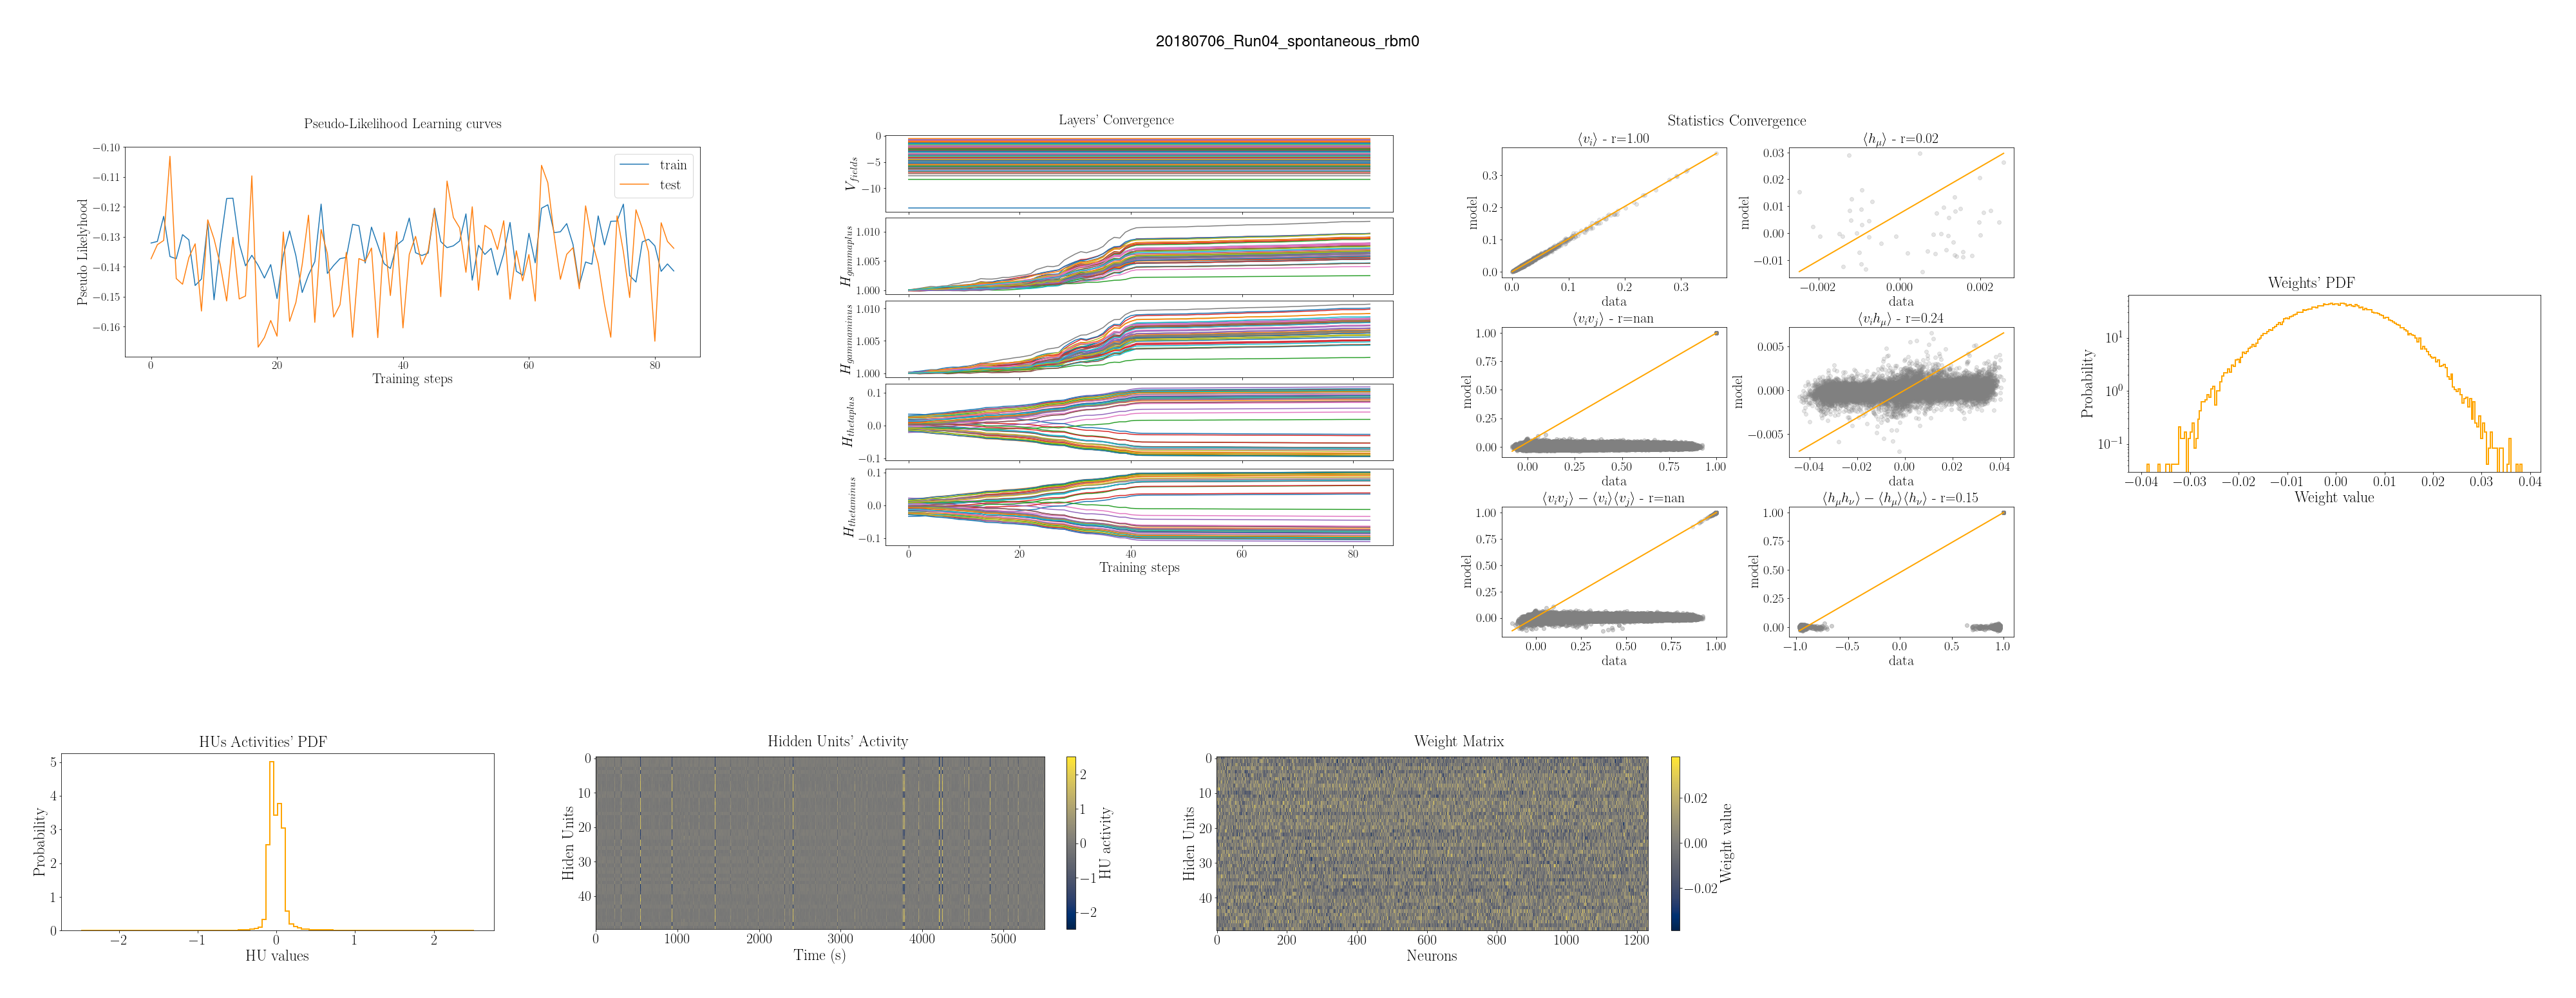

In [5]:
img

In [1]:
import os,sys
sys.path.append('PGM/utilities/')
sys.path.append('PGM/source/')
import numpy as np
import pickle
import rbm
import matplotlib.pyplot as plt
from matplotlib import cm, rc

# Use LaTeX throughout the figure for consistency
rc("font", **{"family": "serif", "serif": ["Computer Modern"], "size": 16})
rc("text", usetex=True)

%matplotlib inline

/SEC/ZebraFish/Tools_Analysis/RBM_ZebraFish/PGM/source/numba_utilities.py:1124: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dmean_v_dw = np.dot(s1.T, V)
/SEC/ZebraFish/Tools_Analysis/RBM_ZebraFish/PGM/source/numba_utilities.py:1125: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dvar_e_dw = np.dot(s2.T, V)
/SEC/ZebraFish/Tools_Analysis/RBM_ZebraFish/PGM/source/numba_utilities.py:1126: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  tmp3 = np.dot(s3.T, V)
/SEC/ZebraFish/Tools_Analysis/RBM_ZebraFish/PGM/source/numba_utilities.py:961: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 1d, A), array(float32, 2d, A))
  mean_V = np.dot(weights, V) / sum_weights


In [83]:
%load_ext autoreload
%autoreload 2
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the data
for now we use binary input data to the RBM.

### paths

In [2]:
spike_path = "/SEC/ZebraFish/Data/Voxmatok_out/test2/20180706_Run04_spontaneous_rbm0/20180706_Run04_spontaneous_rbm0_voxels_activity_20210713_110920.npy"

### load

In [3]:
spikes = np.load(spike_path).T
print(f"spikes loaded  -->  shape = {spikes.shape}  (should be [time x neurons])")
n_steps, n_neurons = tuple(spikes.shape)
print(f"\t {n_steps} time steps  |  {n_neurons} neurons")

spikes loaded  -->  shape = (5500, 1232)  (should be [time x neurons])
	 5500 time steps  |  1232 neurons


### choose train/test

In [4]:
ptrain, pvalid = 75,25 # percentage of time steps to use for train and for valid (if ptrain+pvalid != 100, the rest will not be used)
#ptrain, pvalid = 30,10 # percentage of time steps to use for train and for valid (if ptrain+pvalid != 100, the rest will not be used)

np.random.shuffle(spikes)
print("spikes shuffled")

ntrain = int(n_steps * ptrain / 100)
nvalid = int(n_steps * pvalid / 100)

train_spikes = spikes[0:ntrain]
print(f"loaded {ntrain} ({ptrain})\% time steps for training.")

valid_spikes = spikes[ntrain:ntrain+nvalid]
print(f"loaded {nvalid} ({pvalid})\% time steps for validation.")

spikes shuffled
loaded 4125 (75)\% time steps for training.
loaded 1375 (25)\% time steps for validation.


## Parameters

In [5]:
lamb = 0.#0.02                                                  # sparcity paramter lambda
nHU = 50                                                    # number of hidden units
n_mcc = 15                                                   # number of Monte Carlo chains
n_updates = 20                                               # number of training steps
batch_size = 100                                             # number of data points per training step
lr = 1e-3                                                    # learning rate
lr_final = 1e-5                                              # final learning rate
decay_after = 0.25                                           # ??
hidden_prior = "dReLU"                                       # hidden potential type
visible_prior = "Bernoulli"                                  # visible potential type

n_iterations = 20 #int(n_updates / (n_steps / batch_size))       # ??

## Setup the RBM

In [6]:
RBM = rbm.RBM(
    n_v=n_neurons,
    n_h=nHU,
    visible=visible_prior,
    hidden=hidden_prior
)

## Training the RBM

In [7]:
start_L = RBM.likelihood(spikes).mean()
print(f"Starting Likelihood = {start_L:0.4f}")

res = RBM.fit(
    train_spikes,
    data_test=valid_spikes,
    learning_rate=lr,
    lr_final=lr_final,
    decay_after=decay_after,
    optimizer='ADAM', 
    extra_params=[0, 0.999, 1e-6], 
    vverbose=0,
    verbose=1,
    n_iter=n_iterations, 
    #l1=lamb, 
    N_MC=n_mcc,
    record=['PL','PL_test','v_fields','h_gamma_plus','h_gamma_minus','h_theta_plus','h_theta_minus'],
    record_interval=1,
)

stop_L = RBM.likelihood(spikes,recompute_Z=True).mean()
print(f"Done. Likelihood : {start_L:0.4f} --> {stop_L:0.4f}")

Starting Likelihood = -855.6029
Iteration number 0, pseudo-likelihood: -0.14
Starting epoch 1
Mismatch dimensions (10, 50), [100, 50], reinitializating I
Mismatch dimensions (10, 1232), [100, 1232], reinitializating I


/SEC/ZebraFish/Tools_Analysis/RBM_ZebraFish/PGM/source/layer.py:1188: RuntimeWarning: overflow encountered in true_divide
  p_plus = 1 / (1 + (etg_minus / np.sqrt(self._gamma_minus)
/SEC/ZebraFish/Tools_Analysis/RBM_ZebraFish/PGM/source/layer.py:1225: RuntimeWarning: overflow encountered in true_divide
  p_plus = 1 / (1 + (etg_minus / np.sqrt(self._gamma_minus)


[RBM] Iteration 1, time = 17.65s, pseudo-likelihood = -0.11
Starting epoch 2
[RBM] Iteration 2, time = 12.63s, pseudo-likelihood = -0.10
Starting epoch 3
[RBM] Iteration 3, time = 13.68s, pseudo-likelihood = -0.10
Starting epoch 4
[RBM] Iteration 4, time = 13.25s, pseudo-likelihood = -0.10
Starting epoch 5
[RBM] Iteration 5, time = 14.43s, pseudo-likelihood = -0.09
Starting epoch 6
[RBM] Iteration 6, time = 11.98s, pseudo-likelihood = -0.10
Starting epoch 7
[RBM] Iteration 7, time = 15.19s, pseudo-likelihood = -0.08
Starting epoch 8
[RBM] Iteration 8, time = 14.12s, pseudo-likelihood = -0.09
Starting epoch 9
[RBM] Iteration 9, time = 13.27s, pseudo-likelihood = -0.08
Starting epoch 10
[RBM] Iteration 10, time = 14.83s, pseudo-likelihood = -0.08
Starting epoch 11
[RBM] Iteration 11, time = 13.97s, pseudo-likelihood = -0.08
Starting epoch 12
[RBM] Iteration 12, time = 13.68s, pseudo-likelihood = -0.09
Starting epoch 13
[RBM] Iteration 13, time = 12.69s, pseudo-likelihood = -0.09
Starting

## Saving

In [89]:
pickle.dump(RBM,open("test_RBM.pickle","wb"))

## Load

In [7]:
RBM = pickle.load(open("test_RBM.pickle","rb"))

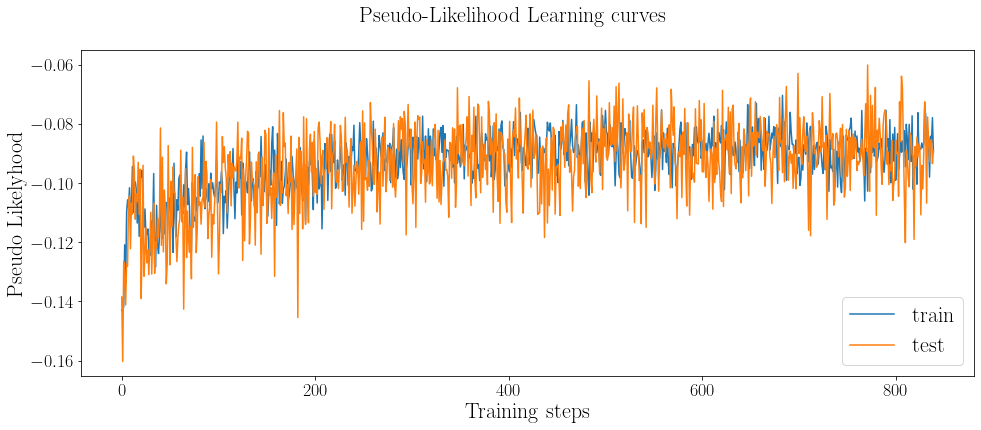

In [52]:
%matplotlib inline
plot_learning_curve(res,show=True,save="",suf="")

params = ['v_fields', 'h_gamma_plus', 'h_gamma_minus', 'h_theta_plus', 'h_theta_minus']


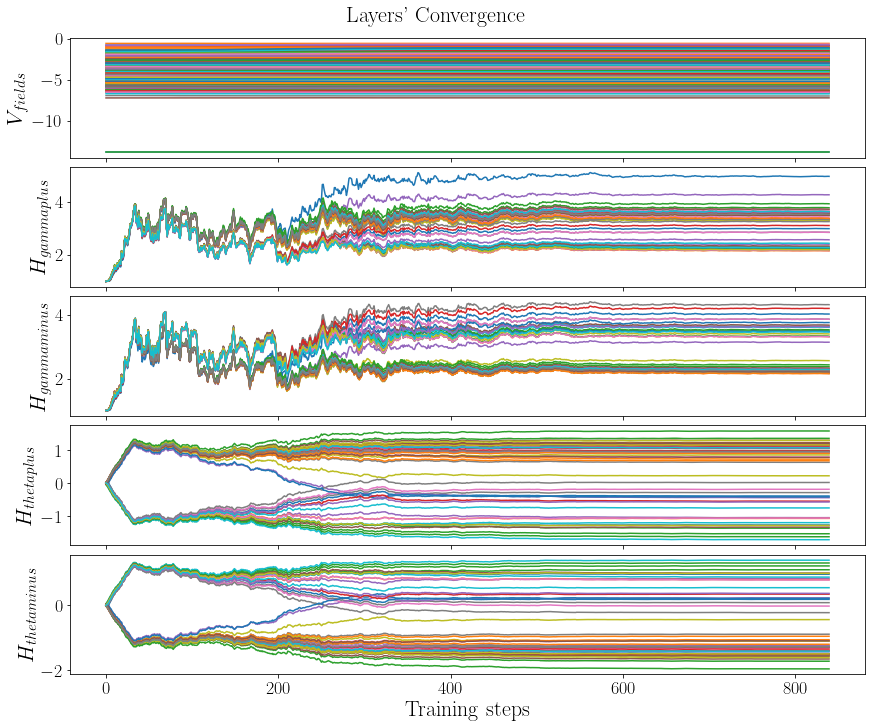

In [61]:
%matplotlib inline
plot_layer_convergence(res,show=True,save="",suf="")

## Analyse statistics

### Generate data

In [29]:
datav, datah = RBM.gen_data(Nthermalize=1000,Nstep=100,Nchains=100,Lchains=100)

Mismatch dimensions (10, 50), [100, 50], reinitializating I
Mismatch dimensions (10, 1232), [100, 1232], reinitializating I


### Plot stat convergence

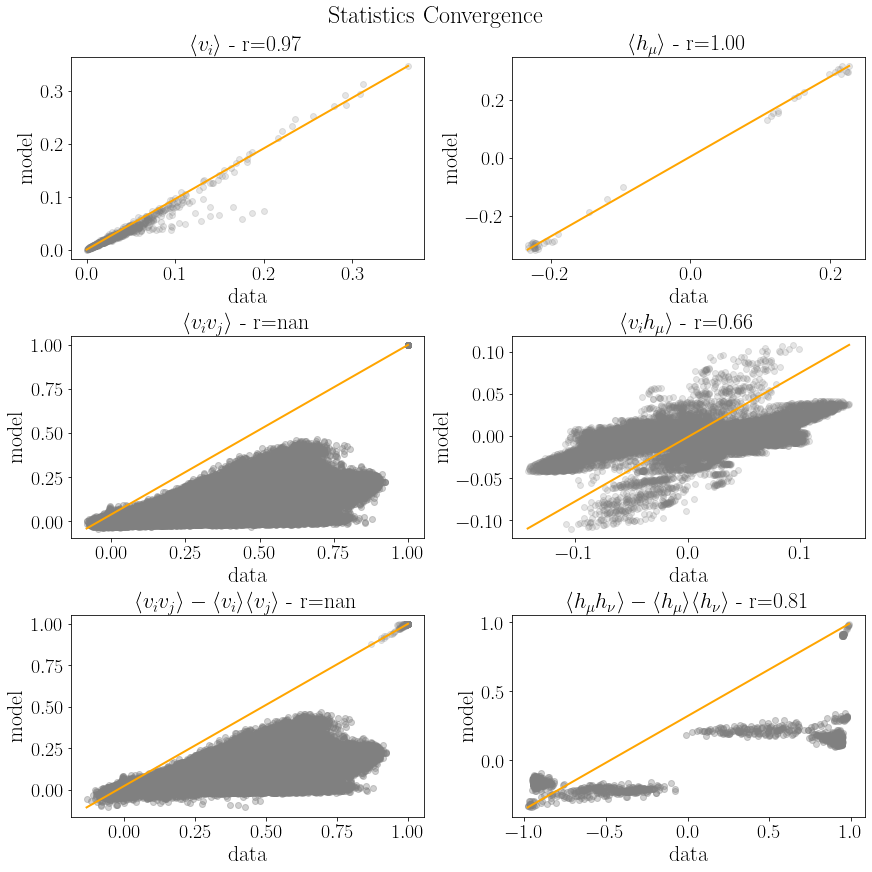

In [65]:
%matplotlib inline
plot_stat_convergence(RBM, spikes, datav, datah, show=True, save="", suf="")

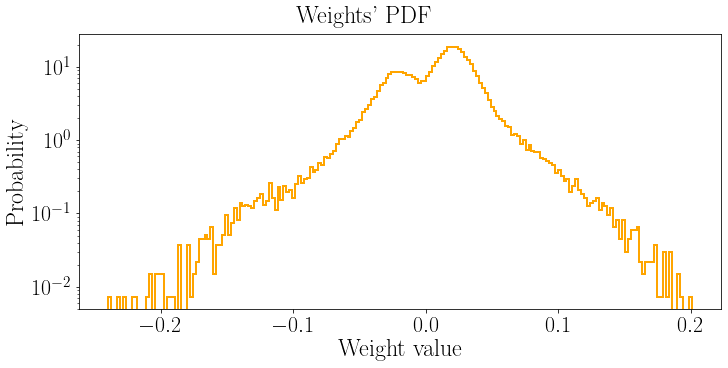

In [69]:
%matplotlib inline
plot_weight_distrib(RBM, show=True, save="", suf="")

In [32]:
h_activity = RBM.mean_hiddens(spikes)

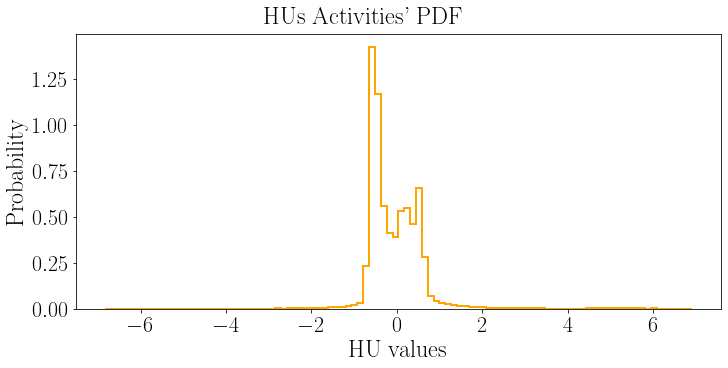

In [72]:
%matplotlib inline
plot_hu_distrib(h_activity, show=True, save="", suf="")

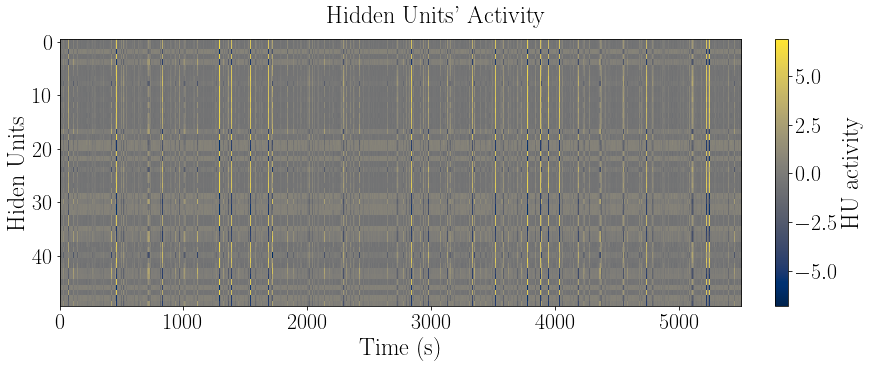

In [75]:
%matplotlib inline
plot_hidden_activity(h_activity, show=True, save="", suf="")

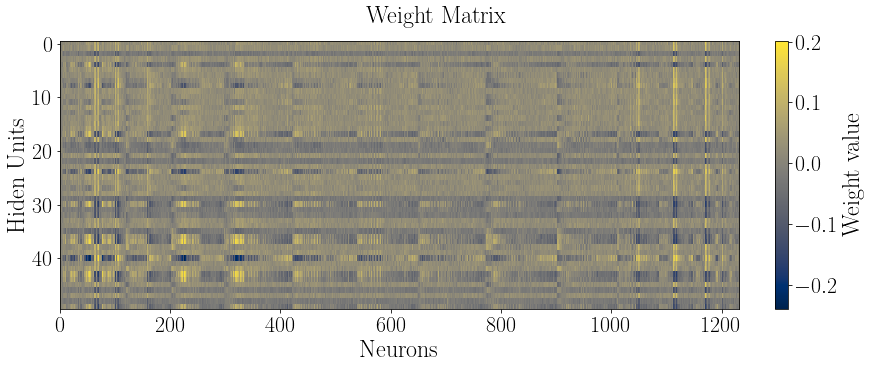

In [78]:
%matplotlib inline
plot_weight_matrix(RBM, show=True, save="", suf="")

In [85]:
make_analysis_montage("temp/","temp/TandI.png",title="20180706_Run04_spontaneous_rbm0",clean=True)

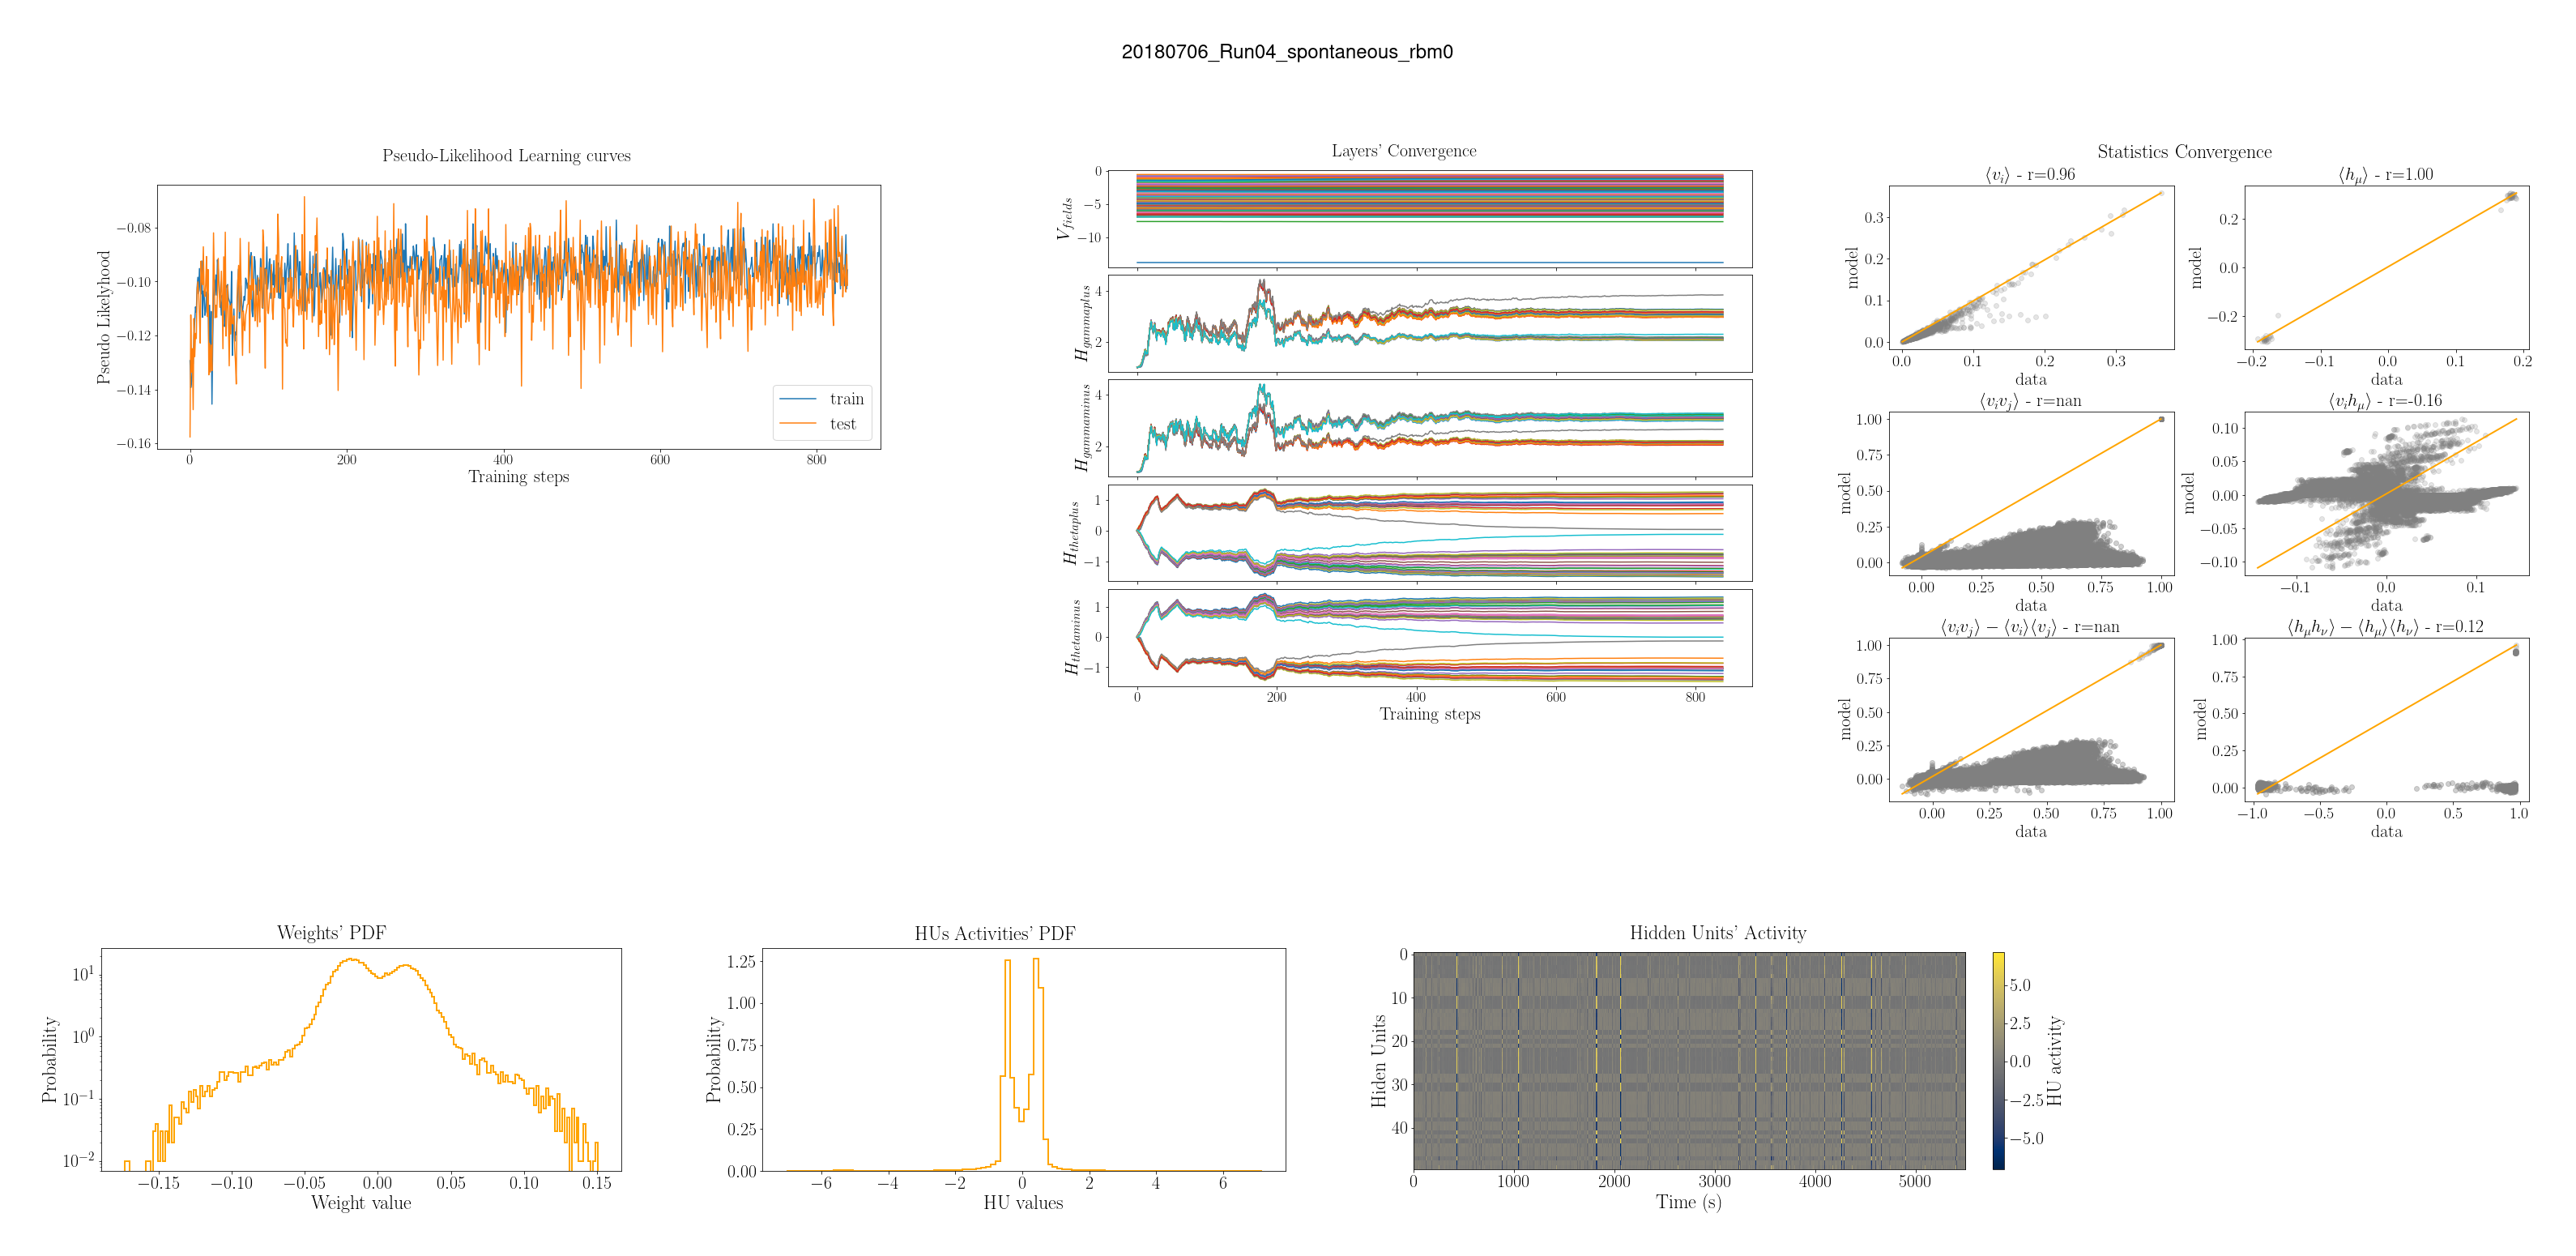

In [92]:
from IPython.display import Image
Image(filename="temp/TandI.png")

# QUESTIONS

1. n_iterations calculation give 0. ???
2. what is decay after ?
3. what is acceptance ? why could i want to record it
4. diff between pseudolikelyhood and likelyhood ?
5. zlayer ?
6. utility of multithread ? (small tests show that its better to do 1 thread than 16 for 20 iterations ( 2->10mins or fit and 9.5->3.5mins for gen) ) + have you tested the impact for more iterations ?